# Tree Based Models and Combination Models

In this notebook, we continue trying to model our dataset in an attempt to examine the relationship between stock percentage returns and local economic variables.

For each stock price, we will create tree models with and without our exogenous variables. We will utilize RandomForestRegression and XGBoost to create our tree models. 

As a final step, we will utilize our SARIMAX model and utilize XGBoost on the residuals to estimate our stock prices. 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

from statsmodels.tsa.statespace.sarimax import SARIMAX


from xgboost import XGBRegressor

In [98]:
processed_data = pd.read_csv("C:/Users/benns/Projects/Forecasting- Local vs. Base/formatted_data.csv", index_col = 'Date')
processed_data.head()

,PNC,PPG,EQT,Unemployment,Med Home
Date,,,,,
2000-02-01,-3.769677,-13.250999,-2.002493,0.000000,-0.627032
2000-03-01,-2.206935,-4.695125,17.302942,-7.843137,0.064328
2000-04-01,11.113336,8.827048,11.776062,-19.148936,0.940838
2000-05-01,-0.533925,1.906303,7.032762,13.157895,1.327662
2000-06-01,16.687651,-14.631165,2.186279,6.976744,1.124730


### RandomForestRegression No Exogenous Variables

Our first tree models will be simple random forest models without exogenous variables. We'll use a grid search for hyperparameter selection for each model in an attempt to see how the best model performs against the SARIMA models and our extra variables.

In [99]:
def make_lags(series, lags = [1,2,12]):
    df = pd.DataFrame(series)
    for lag in lags:
        df[f"lag{lag}"] = df[series.name].shift(lag)
    return df.dropna()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 3, 'n_estimators': 300}
Best CV score (MSE): -48.09902333016578
RMSE: 6.8906
Max Error: 11.7453


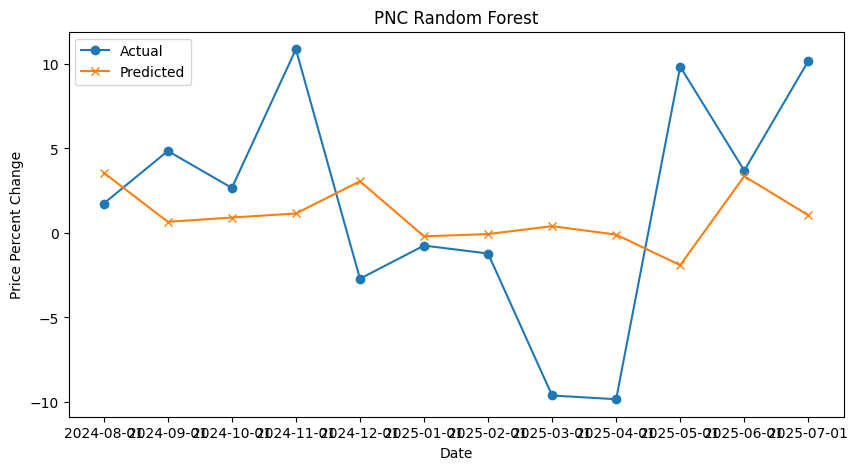

In [101]:
pnc_no_ex = make_lags(processed_data['PNC'], lags = [1,2,12])

X = pnc_no_ex.drop(columns = 'PNC')
y = pnc_no_ex['PNC']

train_size = len(pnc_no_ex)-12

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "max_depth":[3,5,7,10],
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PNC Random Forest")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 3, 'n_estimators': 100}
Best CV score (MSE): -37.584661891317545
RMSE: 4.9672
Max Error: 11.3359


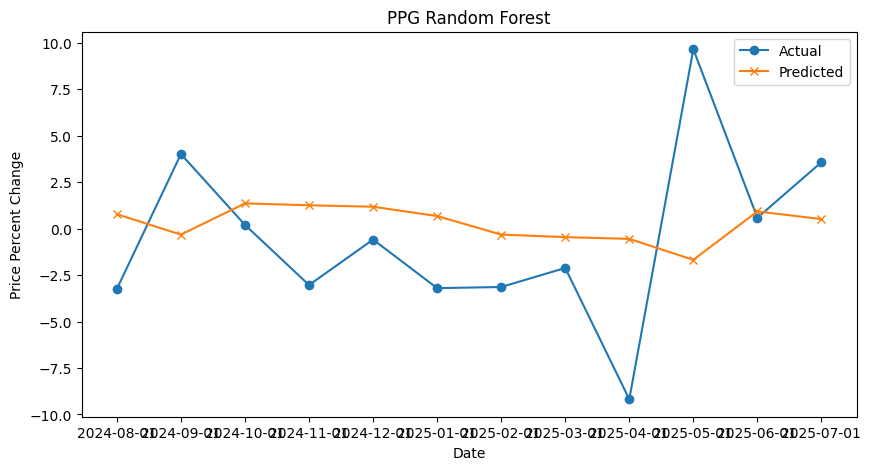

In [102]:
pnc_no_ex = make_lags(processed_data['PPG'], lags = [1,2,12])

X = pnc_no_ex.drop(columns = 'PPG')
y = pnc_no_ex['PPG']

train_size = len(pnc_no_ex)-12

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "max_depth":[3,5,7,10],
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PPG Random Forest")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 3, 'n_estimators': 300}
Best CV score (MSE): -93.5085725427931
RMSE: 7.9398
Max Error: 15.1252


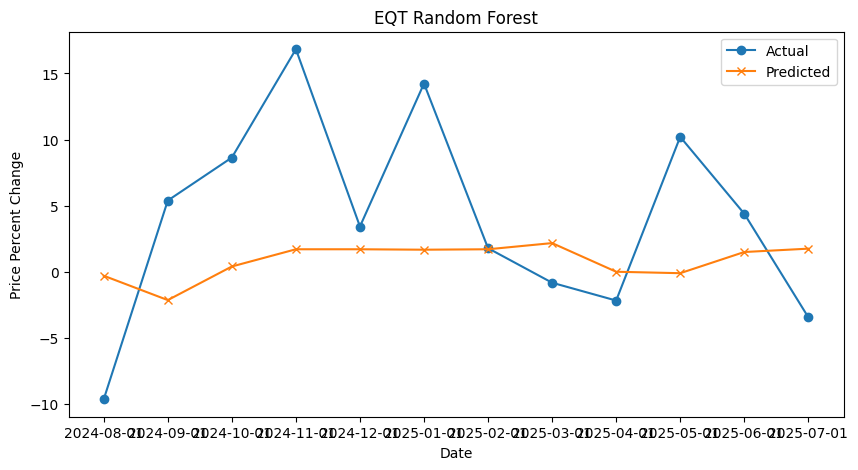

In [104]:
pnc_no_ex = make_lags(processed_data['EQT'], lags = [1,2,12])

X = pnc_no_ex.drop(columns = 'EQT')
y = pnc_no_ex['EQT']

train_size = len(pnc_no_ex)-12

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "max_depth":[3,5,7,10],
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("EQT Random Forest")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Both PNC and PPG appear to be suffering from the 'day late' effect, in essence the first lag variable being the most deterministic one for the next value. This was apparent in the SARIMAX modeling before, but even the forest model tends to capture it as a larger effect. All of the best models for the stock prices improved as parameter values decreased. The best predictions also seem close to the trivial prediction although some trend is evident from each of the graphs.

Let's go on to include exogenous variables.

### Random Forest Regression with Exogenous Variables

In [105]:
def make_lags_exo(df, lags = [1,2,12]):
    df_lagged = df.copy()
    for col in df.columns:
        for lag in lags:
            df_lagged[f"{col}_lag{lag}"]=df[col].shift(lag)

    return df_lagged.dropna()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 3, 'n_estimators': 100}
Best CV score (MSE): -47.90113595430516
RMSE: 6.5191
Max Error: 10.0036


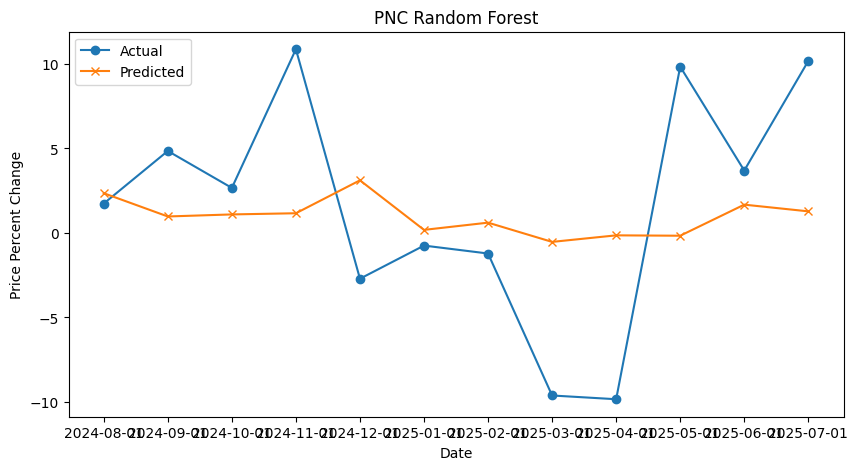

In [106]:
target = "PNC"
exog_vars = ["Unemployment", "Med Home"]

Xy = processed_data[[target] + exog_vars]

pnc_ex = make_lags_exo(Xy, lags = [1,2,12])

y = pnc_ex[target]
X = pnc_ex.drop(columns = [target])

train_size = len(pnc_ex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "max_depth":[3,5,7,10],
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PNC Random Forest")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 3, 'n_estimators': 300}
Best CV score (MSE): -36.69716822133987
RMSE: 4.8565
Max Error: 10.4117


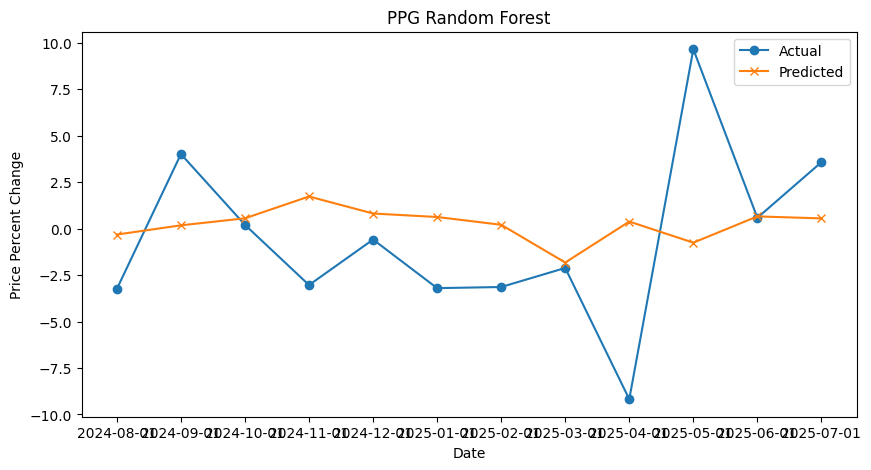

In [107]:
target = "PPG"
exog_vars = ["Unemployment", "Med Home"]

Xy = processed_data[[target] + exog_vars]

pnc_ex = make_lags_exo(Xy, lags = [1,2,12])

y = pnc_ex[target]
X = pnc_ex.drop(columns = [target])

train_size = len(pnc_ex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "max_depth":[3,5,7,10],
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PPG Random Forest")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'max_depth': 7, 'n_estimators': 800}
Best CV score (MSE): -92.5889784224765
RMSE: 9.0174
Max Error: 15.8055


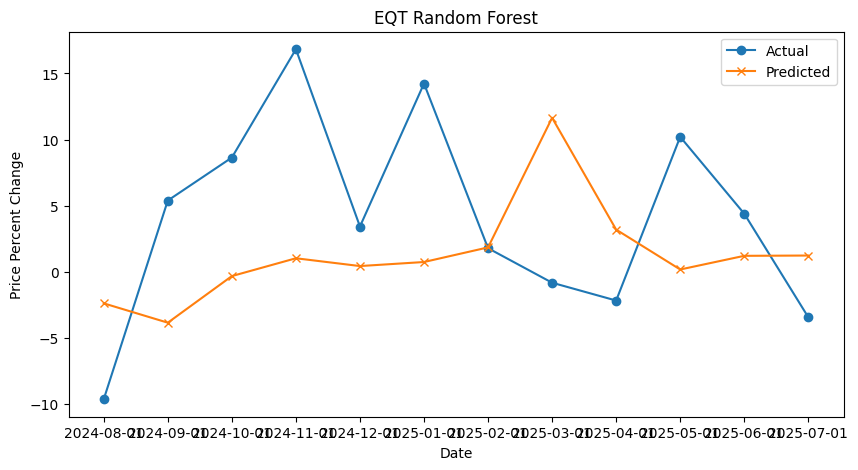

In [108]:
target = "EQT"
exog_vars = ["Unemployment", "Med Home"]

Xy = processed_data[[target] + exog_vars]

pnc_ex = make_lags_exo(Xy, lags = [1,2,12])

y = pnc_ex[target]
X = pnc_ex.drop(columns = [target])

train_size = len(pnc_ex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "max_depth":[3,5,7,10],
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("EQT Random Forest")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

After introducing exogenous variables, we start to see some differing behavior from the model selection process. PNC and PPG had more successful modeling when utilizing lower parameters, while EQT preferred more trees and more depth overall. Notice also that models with more parameter complexity yield predictions that are further away from the Expected value forecast for the time series. 

Overall the performance of the base Random Forest methods are comparable to the base ARIMA models in the last notebook. This suggests that Random Forest can learn the noise of the data relatively well since a (1,0,0) process was the most successful strategy for PNC and EQT stock returns. 

Each stock also behaved quite differently when exogenous variables were introduced. PNC and PPG had a slightly improved performance. This follows PNC's behavior with respect to the increasing model complexity in the last notebook. PPG on the other hand had worsened performance with the model complexity.

EQT had more or less the same behavior, that any increases in model complexity yields less accurate results.

Let's move onto XGBoost modeling.

### XGBoost No Exogneous Variables

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best CV score (MSE): -45.927488871400826
RMSE: 6.8543
Max Error: 11.1830


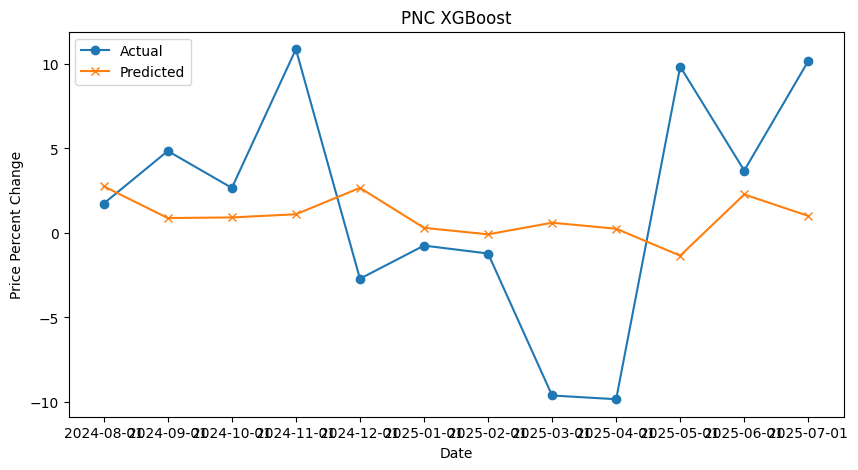

In [111]:
target = 'PNC'

pnc_xgb_noex = make_lags(processed_data['PNC'], lags = [1,2,12])

X = pnc_xgb_noex.drop(columns = [target])
y=pnc_xgb_noex[target]

train_size = len(pnc_xgb_noex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "learning_rate":[.1, .05, .01],
    "max_depth":[3,5,7,10],
    "subsample":[.7, .8],
}


tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBRegressor(cosample_bytree =.8, random_state=42, objective="reg:squarederror"),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PNC XGBoost")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()



Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV score (MSE): -35.62683817904198
RMSE: 4.8892
Max Error: 10.8080


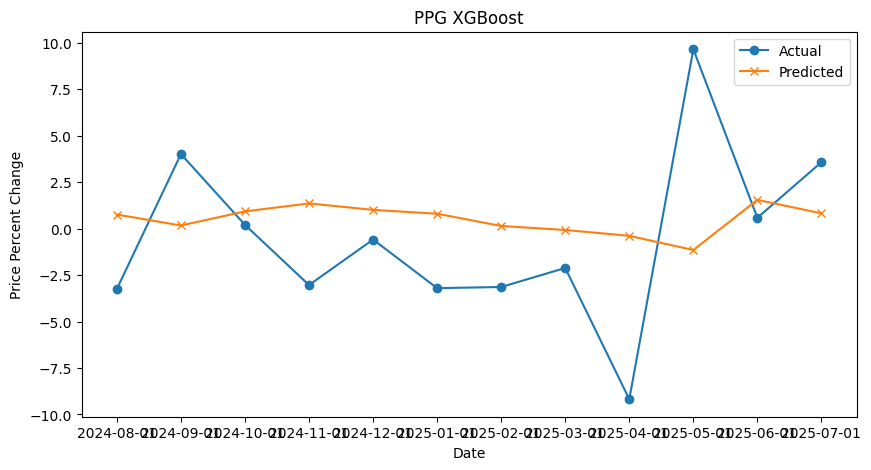

In [112]:
target = 'PPG'

pnc_xgb_noex = make_lags(processed_data['PPG'], lags = [1,2,12])

X = pnc_xgb_noex.drop(columns = [target])
y=pnc_xgb_noex[target]

train_size = len(pnc_xgb_noex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "learning_rate":[.1, .05, .01],
    "max_depth":[3,5,7,10],
    "subsample":[.7, .8],
}


tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBRegressor(cosample_bytree =.8, random_state=42, objective="reg:squarederror"),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PPG XGBoost")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV score (MSE): -90.16830987163456
RMSE: 7.9255
Max Error: 15.2462


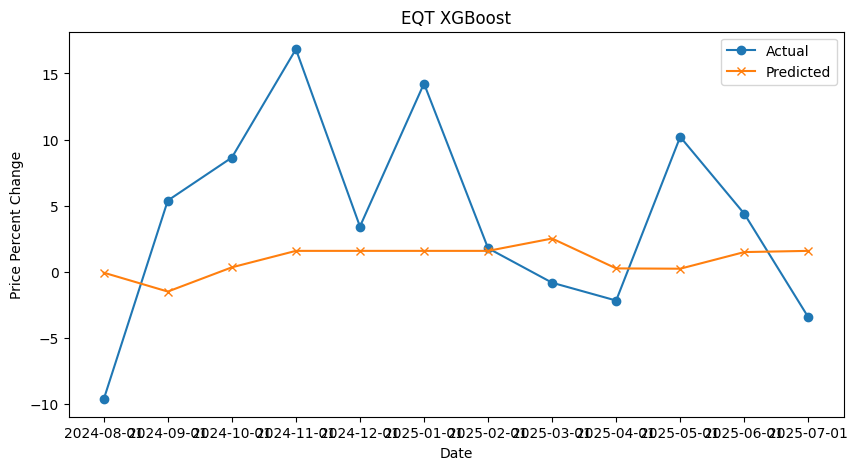

In [113]:
target = 'EQT'

pnc_xgb_noex = make_lags(processed_data['EQT'], lags = [1,2,12])

X = pnc_xgb_noex.drop(columns = [target])
y=pnc_xgb_noex[target]

train_size = len(pnc_xgb_noex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "learning_rate":[.1, .05, .01],
    "max_depth":[3,5,7,10],
    "subsample":[.7, .8],
}


tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBRegressor(cosample_bytree =.8, random_state=42, objective="reg:squarederror"),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("EQT XGBoost")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

We tuned hyper parameters for each model individually. On the whole, it seemed XGBoost performed better than Random Forest, indicating that patterns detectable by Random Forest are at least as detectable with XGBoost. Still, none of these models have ourperformed our base ARIMA models.

Let's see if the addition of exogneous variables improves accuracy or destabilizes the model like before.

### XGBoost with Exogenous Variables

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best CV score (MSE): -46.938768478927194
RMSE: 6.5239
Max Error: 9.7682


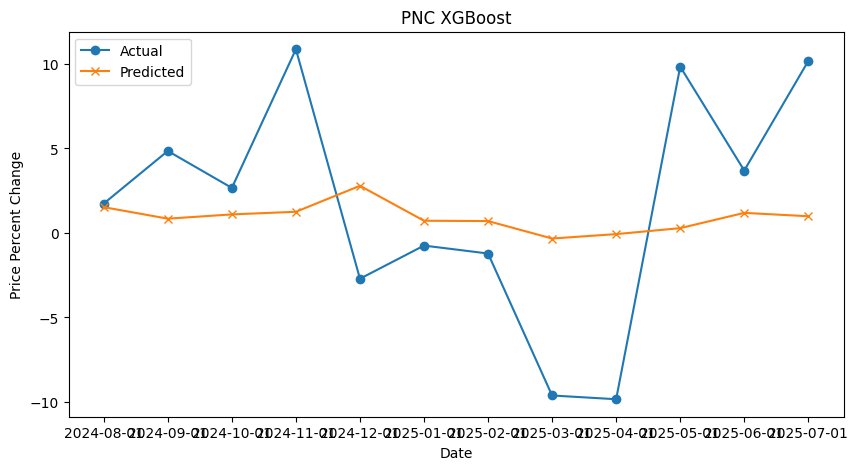

In [114]:
target = "PNC"
exog_vars = ["Unemployment", "Med Home"]

Xy = processed_data[[target] + exog_vars]

eqt_ex = make_lags_exo(Xy, lags = [1,2,12])

y = eqt_ex[target]
X = eqt_ex.drop(columns = [target])

train_size = len(eqt_ex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "learning_rate":[.1, .05, .01],
    "max_depth":[3,5,7,10],
    "subsample":[.7, .8],
}


tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBRegressor(cosample_bytree =.8, random_state=42, objective="reg:squarederror"),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PNC XGBoost")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV score (MSE): -35.201848017815244
RMSE: 4.7554
Max Error: 9.7492


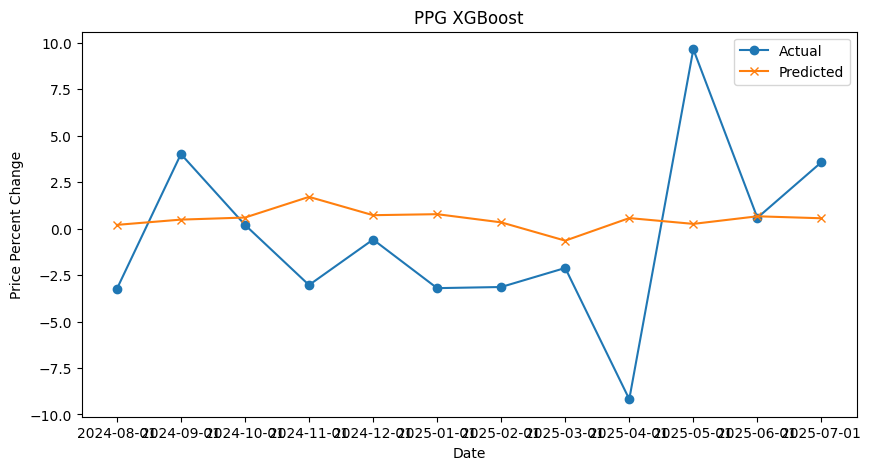

In [115]:
target = "PPG"
exog_vars = ["Unemployment", "Med Home"]

Xy = processed_data[[target] + exog_vars]

eqt_ex = make_lags_exo(Xy, lags = [1,2,12])

y = eqt_ex[target]
X = eqt_ex.drop(columns = [target])

train_size = len(eqt_ex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "learning_rate":[.1, .05, .01],
    "max_depth":[3,5,7,10],
    "subsample":[.7, .8],
}


tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBRegressor(cosample_bytree =.8, random_state=42, objective="reg:squarederror"),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("PPG XGBoost")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best CV score (MSE): -89.73636071750852
RMSE: 8.2230
Max Error: 15.6964


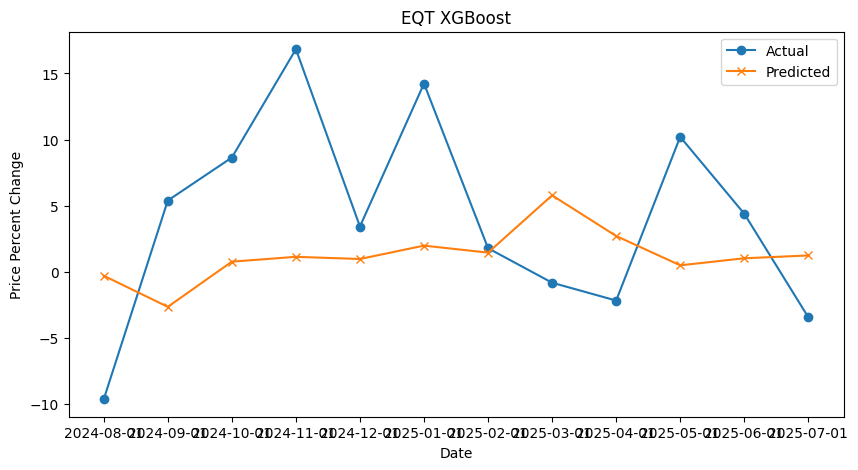

In [116]:
target = "EQT"
exog_vars = ["Unemployment", "Med Home"]

Xy = processed_data[[target] + exog_vars]

eqt_ex = make_lags_exo(Xy, lags = [1,2,12])

y = eqt_ex[target]
X = eqt_ex.drop(columns = [target])

train_size = len(eqt_ex) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


param_grid = {
    "n_estimators":[100, 300, 500, 800],
    "learning_rate":[.1, .05, .01],
    "max_depth":[3,5,7,10],
    "subsample":[.7, .8],
}


tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(
    estimator=XGBRegressor(cosample_bytree =.8, random_state=42, objective="reg:squarederror"),
    param_grid=param_grid,
    cv = tscv, 
    scoring = "neg_mean_squared_error",
    n_jobs=-1,
    verbose = 1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
mae = max_error(y_pred, y_test)

print(f"RMSE: {rmse:.4f}")
print(f"Max Error: {mae:.4f}")

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label = "Actual", marker = "o")
plt.plot(y_test.index, y_pred, label = "Predicted", marker = "x")
plt.title("EQT XGBoost")
plt.xlabel("Date")
plt.ylabel("Price Percent Change")
plt.legend()
plt.show()

We see a pattern forming with the addition of exogenous variables. PNC and PPG predictions improve while EQT predictions worsen. The improvements to PNC and PPF anre slight in RMSE, but we have some measurable improvements in max absolute error. Still, these models are fairly conservative, with no model predicting over a 10 percent price change in stock.

Our last model will attempt to combine the SARIMAX models from the first notebook and the Tree based models from this one. 

### SARIMA and Exogenous Variables

c:\Users\benns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\benns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}


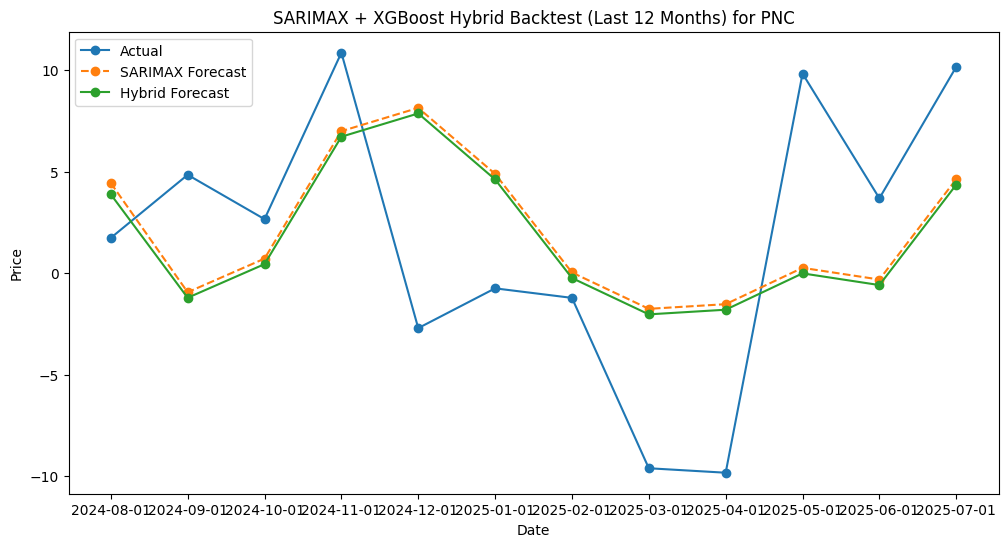


RMSE: 6.3010
Max Absolute Error: 10.5845


In [172]:

target = "PNC"  
exog_vars = ["Unemployment", "Med Home"]  
n_forecast = 12  
lags = 12


series = processed_data[target]
exog = processed_data[exog_vars]

train = series.iloc[:-n_forecast]
test = series.iloc[-n_forecast:]

train_exog = exog.iloc[:-n_forecast]
test_exog = exog.iloc[-n_forecast:]


sarimax_model = SARIMAX(train, 
                        exog=train_exog, 
                        order=(1,0,0), 
                        seasonal_order=(3,1,0,12)).fit(disp=False)


sarimax_pred = sarimax_model.get_forecast(steps=n_forecast, exog=test_exog).predicted_mean


residuals = sarimax_model.resid

X_resid = pd.concat([residuals.shift(i) for i in range(1, lags+1)], axis=1)
X_resid.columns = [f"lag_{i}" for i in range(1, lags+1)]


X_resid = pd.concat([X_resid, train_exog], axis=1)

y_resid = residuals


X_resid = X_resid.iloc[lags:].copy()
y_resid = y_resid.iloc[lags:].copy()


tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, .05]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid.fit(X_resid, y_resid)

xgb_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)


last_resid = residuals[-lags:].values[::-1]  
X_forecast = pd.DataFrame([last_resid], columns=[f"lag_{i}" for i in range(1, lags+1)])
X_forecast = pd.concat([X_forecast.reset_index(drop=True), test_exog.reset_index(drop=True)], axis=1)

xgb_pred_resid = xgb_model.predict(X_forecast)

hybrid_forecast = sarimax_pred.values + xgb_pred_resid

plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual", marker="o")
plt.plot(test.index, sarimax_pred, label="SARIMAX Forecast", linestyle="--", marker="o")
plt.plot(test.index, hybrid_forecast, label="Hybrid Forecast", linestyle="-", marker="o")
plt.title(f"SARIMAX + XGBoost Hybrid Backtest (Last {n_forecast} Months) for {target}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test, hybrid_forecast))
mae = max_error(test, hybrid_forecast)

print(f"\nRMSE: {rmse:.4f}")
print(f"Max Absolute Error: {mae:.4f}")



c:\Users\benns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\benns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}


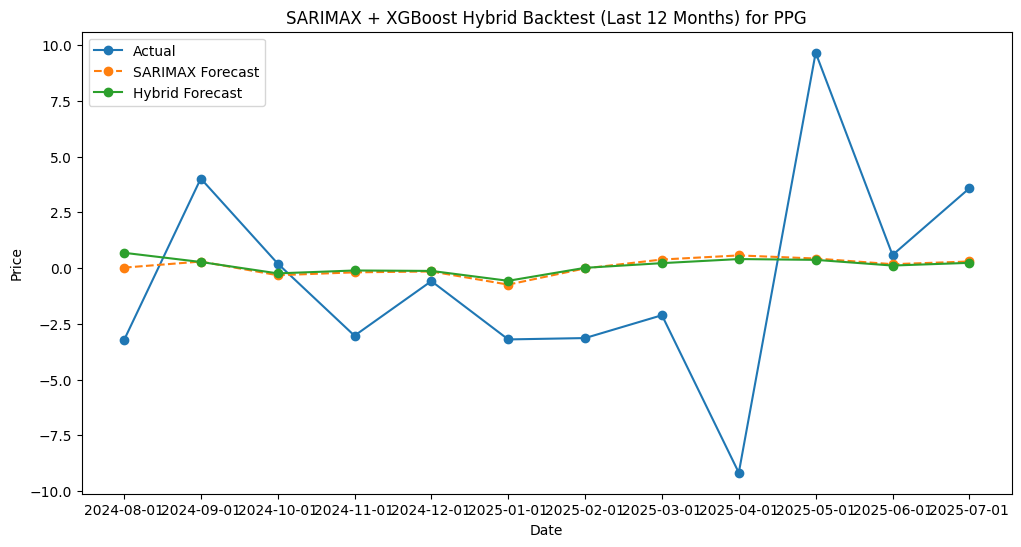


RMSE: 4.5666
Max Absolute Error: 9.5830


In [174]:
target = "PPG"  
exog_vars = ["Unemployment", "Med Home"]  
n_forecast = 12  
lags = 12


series = processed_data[target]
exog = processed_data[exog_vars]

train = series.iloc[:-n_forecast]
test = series.iloc[-n_forecast:]

train_exog = exog.iloc[:-n_forecast]
test_exog = exog.iloc[-n_forecast:]


sarimax_model = SARIMAX(train, 
                        exog=train_exog, 
                        order=(2,0,0), 
                        seasonal_order=(0,0,0,0)).fit(disp=False)


sarimax_pred = sarimax_model.get_forecast(steps=n_forecast, exog=test_exog).predicted_mean


residuals = sarimax_model.resid

X_resid = pd.concat([residuals.shift(i) for i in range(1, lags+1)], axis=1)
X_resid.columns = [f"lag_{i}" for i in range(1, lags+1)]


X_resid = pd.concat([X_resid, train_exog], axis=1)

y_resid = residuals


X_resid = X_resid.iloc[lags:].copy()
y_resid = y_resid.iloc[lags:].copy()


tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, .05]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid.fit(X_resid, y_resid)

xgb_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)


last_resid = residuals[-lags:].values[::-1]  
X_forecast = pd.DataFrame([last_resid], columns=[f"lag_{i}" for i in range(1, lags+1)])
X_forecast = pd.concat([X_forecast.reset_index(drop=True), test_exog.reset_index(drop=True)], axis=1)

xgb_pred_resid = xgb_model.predict(X_forecast)

hybrid_forecast = sarimax_pred.values + xgb_pred_resid

plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual", marker="o")
plt.plot(test.index, sarimax_pred, label="SARIMAX Forecast", linestyle="--", marker="o")
plt.plot(test.index, hybrid_forecast, label="Hybrid Forecast", linestyle="-", marker="o")
plt.title(f"SARIMAX + XGBoost Hybrid Backtest (Last {n_forecast} Months) for {target}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test, hybrid_forecast))
mae = max_error(test, hybrid_forecast)

print(f"\nRMSE: {rmse:.4f}")
print(f"Max Absolute Error: {mae:.4f}")



c:\Users\benns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\benns\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}


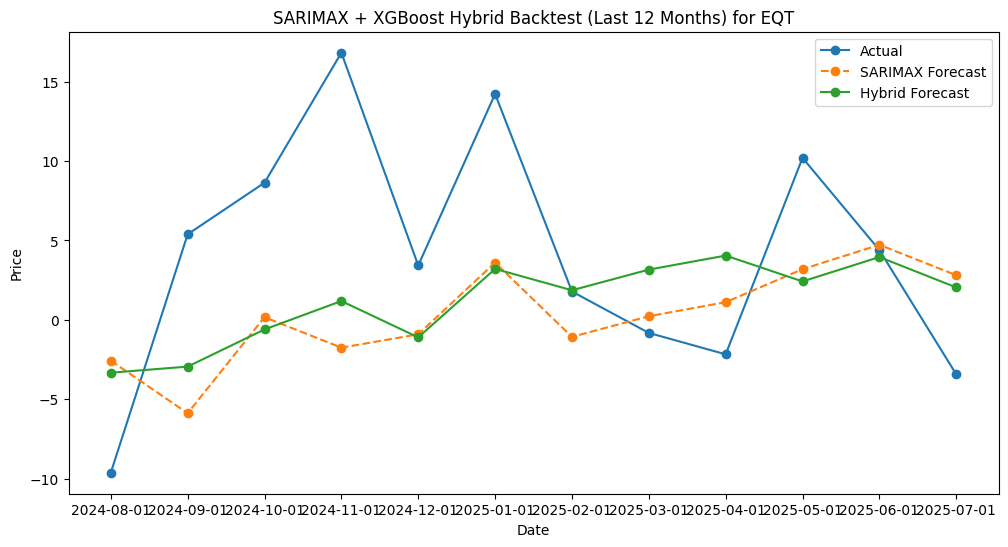


RMSE: 7.7831
Max Absolute Error: 15.6453


In [175]:
target = "EQT"  
exog_vars = ["Unemployment", "Med Home"]  
n_forecast = 12  
lags = 12


series = processed_data[target]
exog = processed_data[exog_vars]

train = series.iloc[:-n_forecast]
test = series.iloc[-n_forecast:]

train_exog = exog.iloc[:-n_forecast]
test_exog = exog.iloc[-n_forecast:]


sarimax_model = SARIMAX(train, 
                        exog=train_exog, 
                        order=(1,0,0), 
                        seasonal_order=(0,0,0,0)).fit(disp=False)


sarimax_pred = sarimax_model.get_forecast(steps=n_forecast, exog=test_exog).predicted_mean


residuals = sarimax_model.resid

X_resid = pd.concat([residuals.shift(i) for i in range(1, lags+1)], axis=1)
X_resid.columns = [f"lag_{i}" for i in range(1, lags+1)]


X_resid = pd.concat([X_resid, train_exog], axis=1)

y_resid = residuals


X_resid = X_resid.iloc[lags:].copy()
y_resid = y_resid.iloc[lags:].copy()


tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, .05]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid.fit(X_resid, y_resid)

xgb_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)


last_resid = residuals[-lags:].values[::-1]  
X_forecast = pd.DataFrame([last_resid], columns=[f"lag_{i}" for i in range(1, lags+1)])
X_forecast = pd.concat([X_forecast.reset_index(drop=True), test_exog.reset_index(drop=True)], axis=1)

xgb_pred_resid = xgb_model.predict(X_forecast)

hybrid_forecast = sarimax_pred.values + xgb_pred_resid

plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual", marker="o")
plt.plot(test.index, sarimax_pred, label="SARIMAX Forecast", linestyle="--", marker="o")
plt.plot(test.index, hybrid_forecast, label="Hybrid Forecast", linestyle="-", marker="o")
plt.title(f"SARIMAX + XGBoost Hybrid Backtest (Last {n_forecast} Months) for {target}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(test, hybrid_forecast))
mae = max_error(test, hybrid_forecast)

print(f"\nRMSE: {rmse:.4f}")
print(f"Max Absolute Error: {mae:.4f}")



The above model is as follows. We take the best performing SARIMAX parameters of the previous notebook and model the residuals using XGBoost. What can we see about each stock? Most of the errors caught by the model comes from the SARIMAX portion. The residual model slightly improves performance in at least PNC and PPG. For EQT, we obtain a model competitive with the ARIMA (1,0,0) process that is nontrivial and where residuals are highly impactful. One must note however, that this model includes exogenous variables instead of only a (1,0,0) process.

All of our XGBoost submodels preferred lower parameter values. The residual modeling on the EQT stock is very different from the slight effects of the residuals on the other two. What may account for this difference requires further investigation.

I elected to use 12 lag variables to try to capture any seasonal residual effects missing by the SARIMAX model. We may obtain better model performance by reducing the lag variables in both the PPG and EQT stock prices, since inducing a seasonal component in their base models worsened evaluation metrics.

The scores of each model are collected in the table below.

|RMSE / MAE| RF no EX | RFEX | XGBoost no EX| XGBoost EX | SARIMA + XGBoost|
|----------|----------|------|--------------|------------|-----------------|
|PNC| 6.8906 / 11.7453| 6.5191 / 10.0036 | 6.8543 / 11.1830 | 6.5239 / 9.7682 | 6.3010 / 10.5845 |
|PPG| 4.9672 / 11.3359| 4.8565 / 10.4117 | 4.8892 / 10.8080 | 4.7554 / 9.7492 | 4.5666 / 9.5830 |
|EQT| 7.9398 / 15.1252| 9.0174 / 15.8055 | 7.9255 / 15.2462 | 8.2230 / 15.6964 | 7.7831 / 15.6453 |

What kind of results can we see from all of our modeling? For PNC, our best performance came from increasing model complexity. We also find that the addition of exogenous variables always reduced the maximum absolute error of the model.

For PPG, model complexity also improved performance slightly and again exogenous variables increased performance with respect to max absolute error.

For EQT, it seems simpler models performed the best. Introduction of exogenous variables only helped our most complex model which was comptetive with the ARIMA (1,0,0) process in the previous notebook. We do find that tree based models reduce the absolute max error for this stock across the board.

In the next notebook, we will do similar kinds of modeling focusing on using LSTMS for modeling. We will train 3 models for each stock: one without exogenous variables, one with, and also construct a hybrid type model using the SARIMA model and modeling the residuals using deep learning.